<a href="https://colab.research.google.com/github/bmanisha7/data690_manisha/blob/main/assignment_04/assignment_04_part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 . Use Pandas to read the file census_costs.txt file

In [38]:
import pandas as pd
df = pd.read_csv("census_costs.txt",sep="\t")

## 2. Find out how many rows and columns it has

In [39]:
df.shape

(23, 4)

## 3. Display first 10, last 10, and random 10 rows

In [40]:
df.head(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [41]:
df.tail(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


In [42]:
df.sample(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
10,1890,"62,979,766","$11,547,127",18.33 cents
2,1810,"7,239,881","$178,445",2.46 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
21,2000,"281,421,906",$4.5 Billion,$15.99
6,1850,"23,191,876","$1,423,351",6.14 cents
22,2010*,"308,745,538",$13 Billion,$42.11
20,1990,"248,718,301","$2,492,830,000",$10.02
11,1900,"76,303,387","$11,854,000",15.54 cents
12,1910,"91,972,266","$15,968,000",17.07 cents


## 4. Find out the data types of all columns - use info() function

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


## 5. Find out the summary statistics of all columns

In [44]:
df.describe(include='all')

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1950,"248,718,301","$11,854,000",71.34 cents
freq,1,1,1,1


##6. Cleanse the data to make the year, population, cost, cost per person numerical type - use apply() function

In [45]:
def pop(a):
  return int(a.replace(",","").replace("*","").replace("$","").replace("cents",""))
df["Census Year"] = df["Census Year"].apply(pop)  
df["Total Population"] = df["Total Population"].apply(pop)

def CC(a):
      a=a.replace(",","").replace("$","")
      if "Billion" in a:
         a=a.replace("Billion","")
         a=(float(a))*(10**9)
         return a
      else:
         return a

df["Census Cost"]=df["Census Cost"].apply(CC)

def AVCP(a):
  if 'cents' in a:
    a=a.replace("cents","")
    a=(float(a))/100
    return a
  if "$" in a:
    a=a.replace("$","")
    #a=(float(a))*(100)
    return a

df["Average Cost Per Person"]=df["Average Cost Per Person"].apply(AVCP)
df[['Census Cost']]=df[['Census Cost']].apply(pd.to_numeric)
df[['Average Cost Per Person']]=df[['Average Cost Per Person']].apply(pd.to_numeric)


df

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,3929214,4.437700e+04,0.0113
1,1800,5308483,6.610900e+04,0.0124
2,1810,7239881,1.784450e+05,0.0246
3,1820,9633822,2.085260e+05,0.0216
4,1830,12866020,3.785450e+05,0.0294
5,1840,17069458,8.333710e+05,0.0488
6,1850,23191876,1.423351e+06,0.0614
7,1860,31443321,1.969377e+06,0.0626
8,1870,38558371,3.421198e+06,0.0887
9,1880,50155783,5.790678e+06,0.1154


##7. Find out the summary statistics of the numerical columns - use describe() function

In [47]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,9.445587e+08,3.368739
std,67.8233,9.622629e+07,2.830037e+09,9.278241
min,1790.0000,3.929214e+06,4.437700e+04,0.011300
25%,1845.0000,2.013067e+07,1.128361e+06,0.055100
50%,1900.0000,7.630339e+07,1.185400e+07,0.170700
75%,1955.0000,1.653245e+08,1.096980e+08,0.658900
max,2010.0000,3.087455e+08,1.300000e+10,42.110000


##8. Use Pandas built-in plotting function to plot the average cost per person over time.

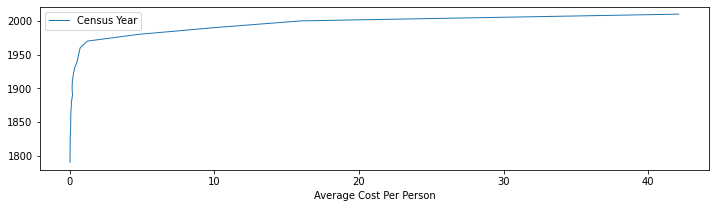

In [48]:
df.plot.line(x = 'Average Cost Per Person', y ='Census Year', figsize =(12, 3), lw = 1)

##9. Use Pandas built-in plotting function to plot the scatter plot of Total Population vs Total Cost.

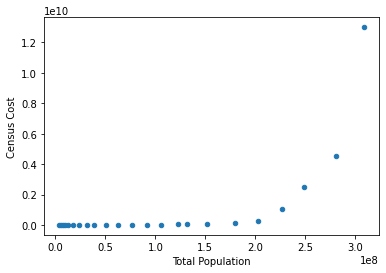

In [49]:
df.plot.scatter(x ='Total Population', y ='Census Cost')